In [1]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import random
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### For visualizing the outputs ###
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [2]:
dataDir='./COCOdataset2017'
dataType='val2017'
# dataType='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

# Initialize the COCO api for instance annotations
coco=COCO(annFile)

# Load the categories in a variable
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

print(cats)

loading annotations into memory...
Done (t=0.38s)
creating index...
index created!
[{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}, {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}, {'supercategory': 'vehicle', 'id': 7, 'name': 'train'}, {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}, {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}, {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}, {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}, {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}, {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}, {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}, {'supercategory': 'animal', 'id': 16, 'name': 'bird'}, {'supercategory': 'animal', 'id': 17, 'n

In [3]:
def getClassName(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return "None"
print('The class name is', getClassName(77, cats))

The class name is cell phone


Number of images containing all the  classes: 2693


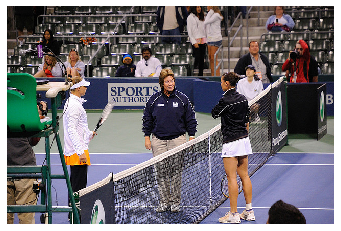

In [4]:
# Define the classes (out of the 81) which you want to see. Others will not be shown.
filterClasses = ['person']

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread('{}/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show()

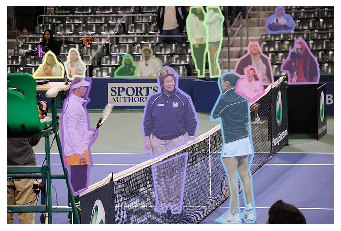

In [5]:
# Load and display instance annotations
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [6]:
print(coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0])

{'license': 3, 'file_name': '000000575187.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000575187.jpg', 'height': 375, 'width': 500, 'date_captured': '2013-11-16 15:48:45', 'flickr_url': 'http://farm1.staticflickr.com/90/242099062_dc4edef2a4_z.jpg', 'id': 575187}


In [7]:
import shutil

shutil.copyfile(dataDir+"/"+dataType+"/"+img['file_name'], dataDir+"/"+dataType+"person/"+img['file_name'])

'./COCOdataset2017/val2017person/000000533816.jpg'

In [8]:
print(len(imgIds))

2693


In [9]:
## Copy image files if they are in the category
# import shutil

# for i in imgIds:
#     image = coco.loadImgs(i)[0]
#     shutil.copyfile(dataDir+"/"+dataType+"/"+image['file_name'], dataDir+"/"+dataType+"person/"+image['file_name'])

In [10]:
# Generate annotation JSON file
import json

# Load Annotation JSON file
with open(annFile) as f:
    df = json.load(f)

# copy basic json data
new_df = {}
new_df["info"] = df["info"]
new_df["licenses"] = df["licenses"]
new_df["categories"] = [df["categories"][0]]

# copy images data if they have person
new_df["images"] = []
for i in imgIds:
    new_df["images"].append(coco.loadImgs(i)[0])

# copy annotations if category is person
new_df["annotations"] = []
for a in df["annotations"]:
    if a["category_id"] == 1:
        new_df["annotations"].append(a)

# Save as JSON file
with open(dataDir+"/annotations/instances_"+dataType+"_person.json", 'w') as f:
    json.dump(new_df, f)